In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [13]:



np.random.seed(100)

r=2 
K=1 
beta=0.25 
Xzero=0.5
T=1 
N=2**11 
dt=float(T)/N
M=500
R = np.array([1, 16, 32,64, 128])# milstein step size
dW = np.sqrt(dt)*np.random.randn(M,N) #brownian increments
Xmil = np.zeros((M,5))

In [39]:
for p in range(5):
    Dt=R[p]*dt;
    L=float(N)/R[p]
    Xtemp=Xzero*np.ones(M)
    for j in range (1, int(L)+1):
        Winc=np.sum(dW[:,range(R[p]*(j-1), R[p]*j)], axis=1) 
        Xtemp = Xtemp+ Dt*r*Xtemp*(K-Xtemp) + beta*Xtemp*Winc+ 0.5*beta**2*Xtemp*(np.power(Winc,2)-Dt)
    Xmil[:,p]=Xtemp
Xerr=np.abs(Xmil[:, range(1,5)]-np.tile(Xref, [4,1]).T)

In [40]:
Xerr

array([[1.10733556e-04, 9.67948418e-05, 2.09399322e-03, 5.98598570e-03],
       [4.35771468e-04, 2.58883021e-03, 4.65142809e-03, 1.05029085e-02],
       [5.59329219e-04, 6.91853939e-04, 1.23283394e-03, 3.72967212e-03],
       ...,
       [9.53736858e-04, 3.25116007e-04, 7.52753867e-04, 3.56668592e-03],
       [3.66870740e-04, 2.26548420e-03, 2.49815454e-03, 9.26920860e-03],
       [5.48939632e-04, 1.65953694e-03, 3.40243725e-03, 8.69676514e-03]])

[0.00072847 0.00145333 0.00298706 0.00639618]


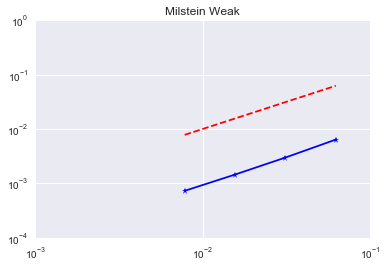

In [45]:
Dtvals = np.multiply(dt,R[1:5])
plt.loglog(Dtvals,np.mean(Xerr,0),'b*-')
plt.loglog(Dtvals,Dtvals,'r--')
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.title('Milstein Weak')
print(np.mean(Xerr,0))